# K-means Pipeline

**K-means** clustering is a popular unsupervised machine learning algorithm that make inferences from datasets using only input vectors without labelled outcomes.

In this notebook, I am going to show an example of implementation of a unsupervised *k-means* algorithm using the Iris dataset.

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm

from sklearn import datasets
from sklearn.cluster import KMeans

%matplotlib inline

**Loading Data**

In [2]:
# loading iris dataset
iris = datasets.load_iris()
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
# checking target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# checking target
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Processing Data**

In [5]:
# creating dfs
names = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
targets = pd.DataFrame(iris.target, columns=['Target'])

In [6]:
# checking head
names.head(3)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
# checking head
targets.head(3)

,Target
0,0
1,0
2,0


**Visualizing Data**

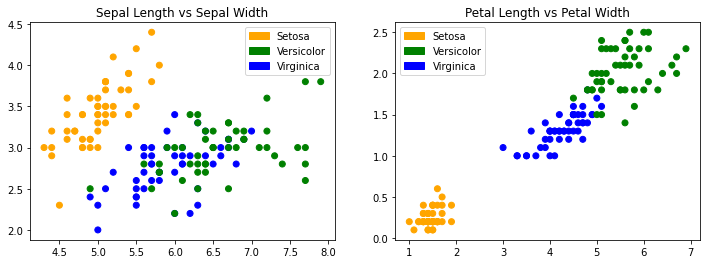

In [8]:
# plotting
plt.figure(figsize=(12,4))
orange = mpatches.Patch(color='orange', label='Setosa')
blue = mpatches.Patch(color='green', label='Versicolor')
green = mpatches.Patch(color='blue', label='Virginica')
colors = np.array(['orange', 'blue', 'green'])

# subplot 1
plt.subplot(1,2,2)
plt.scatter(names['Petal Length'], names['Petal Width'], c= colors[targets['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[orange, blue, green])

# subplot 2
plt.subplot(1, 2, 1)
plt.scatter(names['Sepal Length'], names['Sepal Width'], c=colors[targets['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[orange, blue, green])


**Modelling**

In [9]:
# creating and fitting model
mean_model = KMeans(n_clusters=3)
mean_model.fit(names)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
# checking labels
mean_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
# checking cluster
mean_model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

**Visualizing Data x Predictions**

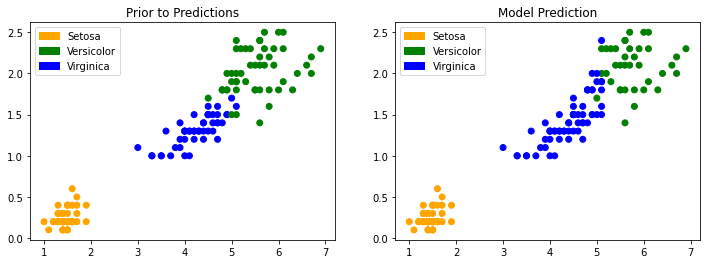

In [14]:
# plotting
plt.figure(figsize=(12,4))
# subplot 1
plt.subplot(1, 2, 1)
plt.scatter(names['Petal Length'], names['Petal Width'], c=colors[targets['Target']])
plt.title('Prior to Predictions')
plt.legend(handles=[orange, blue, green])
# subplot 2
predictions = np.choose(mean_model.labels_, [1, 0, 2]).astype(np.int64)
plt.subplot(1, 2, 2)
plt.scatter(names['Petal Length'], names['Petal Width'], c=colors[predictions])
plt.title('Model Prediction')
plt.legend(handles=[orange, blue, green])

**Checking Acuracy**

In [15]:
# checking accuracy
acc = sm.accuracy_score(predictions, targets['Target'])
print('{0:,.2f}'.format(acc*100),'%')

89.33 %
